## Michael's Analysis

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

In [3]:
# Loading our data
df = pd.read_csv('./data/us_car_data.csv')
df.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,latitude
0,Thurston,Tumwater,WA,98512,2019,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,220,0,22,242565116,PUGET SOUND ENERGY INC,53067010910,-122.913102,47.013593
1,Island,Clinton,WA,98236,2022,NISSAN,LEAF,Battery Electric Vehicle,Eligibility unknown as battery range has not b...,0,0,10,183272785,PUGET SOUND ENERGY INC,53029972000,-122.359364,47.979655
2,Snohomish,Snohomish,WA,98290,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,266,0,44,112552366,PUGET SOUND ENERGY INC,53061052502,-122.091505,47.915555
3,King,Seattle,WA,98134,2020,TESLA,MODEL 3,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,322,0,11,6336319,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033009300,-122.329815,47.579810
4,Snohomish,Edmonds,WA,98020,2013,TESLA,MODEL S,Battery Electric Vehicle,Clean Alternative Fuel Vehicle Eligible,208,69900,21,186212960,PUGET SOUND ENERGY INC,53061050403,-122.375070,47.808070


In [4]:
# My code is incredibly messy. I apologize.
columns_to_keep = ['County', 'Base MSRP', 'Make', 'Model', 'Electric Range']
price_df = df[columns_to_keep]
price_df.head()

,County,Base MSRP,Make,Model,Electric Range
0,Thurston,0,TESLA,MODEL 3,220
1,Island,0,NISSAN,LEAF,0
2,Snohomish,0,TESLA,MODEL 3,266
3,King,0,TESLA,MODEL 3,322
4,Snohomish,69900,TESLA,MODEL S,208


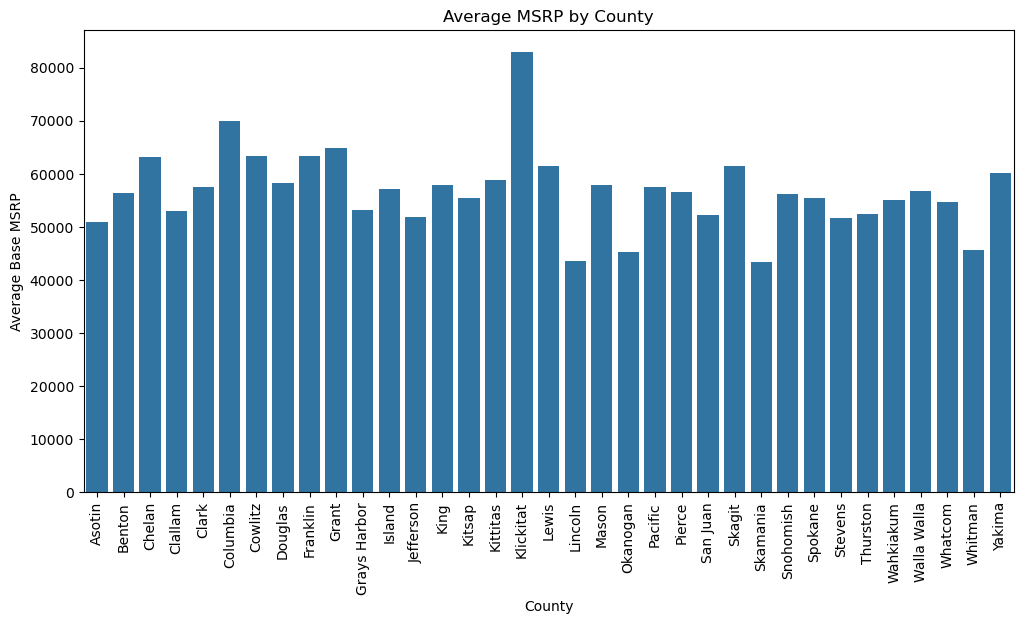

In [5]:
# For a quick look at what we have, let's find out the average price by county. I have to throw out all the zeroes first, though.

# Filter out rows where Base MSRP is 0
filtered_price_df = price_df[price_df['Base MSRP'] > 0]

# Group by 'County' and calculate the average MSRP
average_msrp = filtered_price_df.groupby('County')['Base MSRP'].mean().reset_index()

# Create the bar plot with the grouped data
plt.figure(figsize=(12, 6))
sns.barplot(data=average_msrp, x='County', y='Base MSRP')

# Add titles and labels
plt.title('Average MSRP by County')
plt.xlabel('County')
plt.ylabel('Average Base MSRP')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()



##### This is hard to make out. Let's plot it geographically.

<Axes: xlabel='Longitude', ylabel='latitude'>

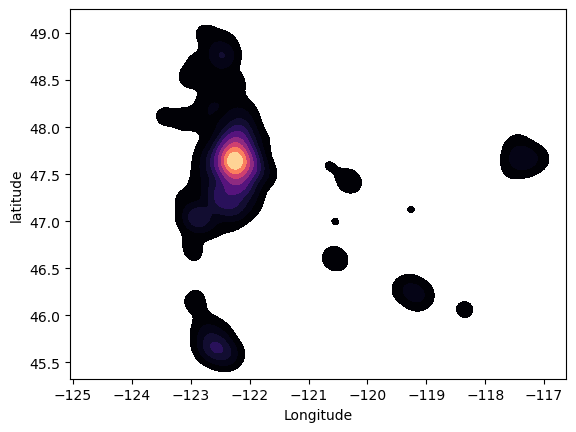

In [6]:
columns_county_MSRP = ['Base MSRP', 'latitude', 'Longitude']
countyMSRP = df[columns_county_MSRP]
sns.kdeplot(x='Longitude', y='latitude', data=countyMSRP, fill=True, cmap='magma')

##### This is sort of exactly what I was expecting. Of course it's going to be centered at the largest city, as that is were most electric vehicles are in the first place! Also, if you were to look up a distribution of income in Washington, you'll see that people in the city make significantly more than people who are rural. Maybe it'd be interesting to zoom in on just Seattle to see how different parts of the city look.

### Let's quickly look at electric range by county.

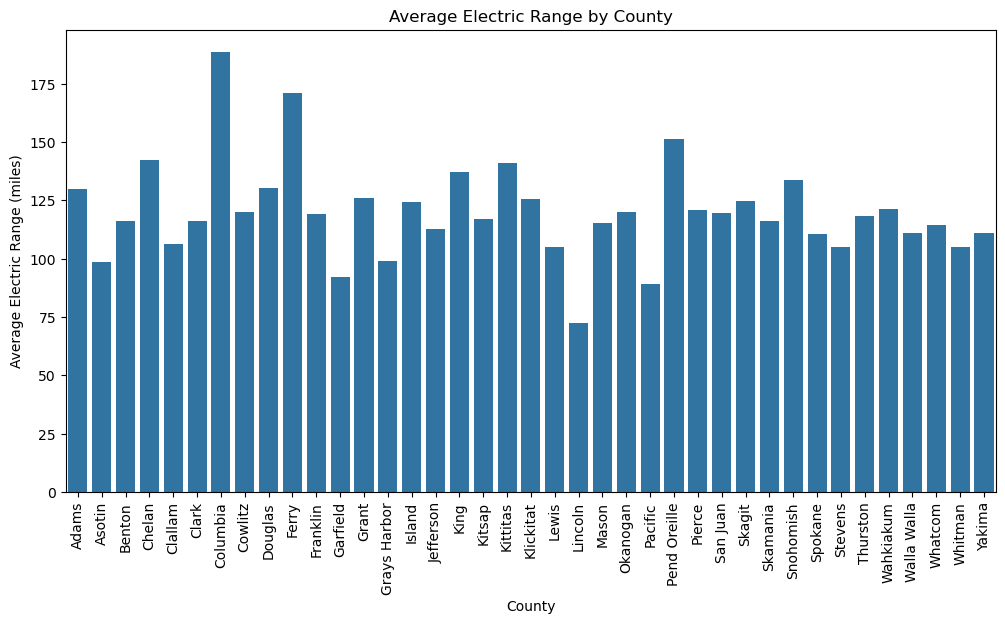

In [7]:
# Filter out rows where Electric Range is 0
filtered_price_df = price_df[price_df['Electric Range'] > 0]

# Group by 'County' and calculate the average Electric Range
average_range = filtered_price_df.groupby('County')['Electric Range'].mean().reset_index()

# Create the bar plot with the grouped data
plt.figure(figsize=(12, 6))
sns.barplot(data=average_range, x='County', y='Electric Range')

# Add titles and labels
plt.title('Average Electric Range by County')
plt.xlabel('County')
plt.ylabel('Average Electric Range (miles)')

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

<Axes: xlabel='Longitude', ylabel='latitude'>

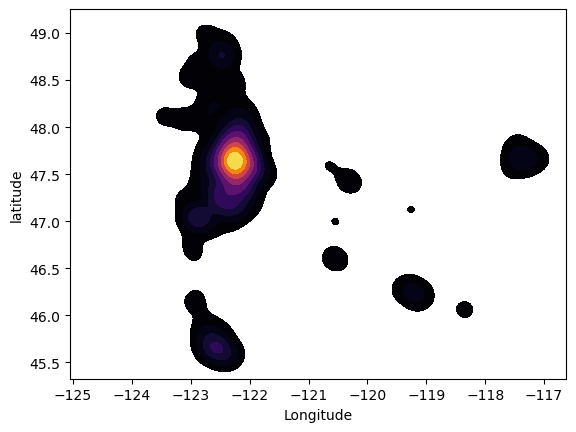

In [8]:
columns_county_range = ['Electric Range', 'latitude', 'Longitude']
countyrange = df[columns_county_range]
sns.kdeplot(x='Longitude', y='latitude', data=countyrange, fill=True, cmap='inferno')

## To be honest, I'm not liking where this is heading. The data here is... hard to work with. Columbia has ONE instance of an MSRP value, so it isn't exactly representative. Even if I threw it out it doesn't seem like there's anything interesting here. Let's try something else, like electric range vs MSRP.

In [9]:
# First we'll make a new df containing the columns we need:
# Make, model, model year, electric range, and base MSRP
columns_to_keep = ['Base MSRP', 'Model', 'Model Year', 'Electric Range']
electric_range_MSRP = df[columns_to_keep]
electric_range_MSRP.head()

,Base MSRP,Model,Model Year,Electric Range
0,0,MODEL 3,2019,220
1,0,LEAF,2022,0
2,0,MODEL 3,2020,266
3,0,MODEL 3,2020,322
4,69900,MODEL S,2013,208


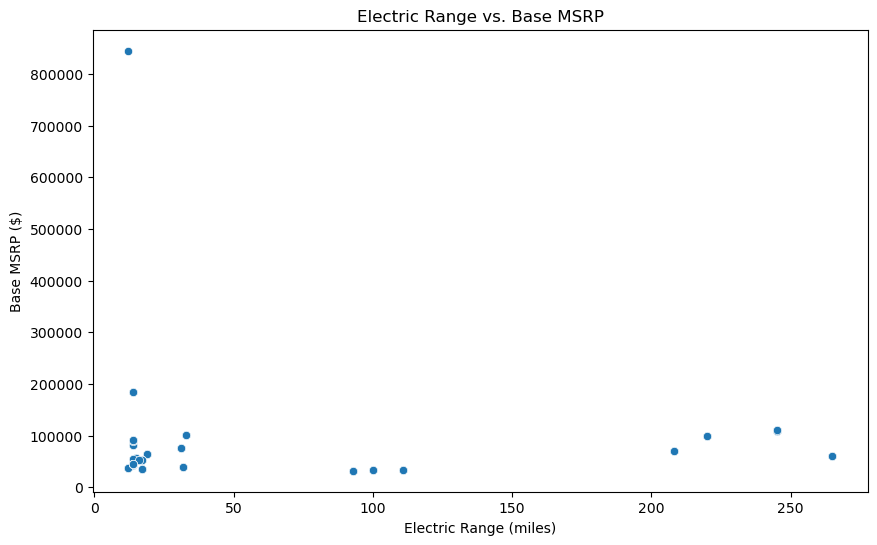

In [10]:
# Of course we don't want to keep rows in which MSRP or electric range are zero, so let's drop those and plot it.
filtered_df = electric_range_MSRP[(electric_range_MSRP['Electric Range'] > 0) & (electric_range_MSRP['Base MSRP'] > 0)]
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Electric Range', y='Base MSRP')

# Add titles and labels
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')

# Show the plot
plt.show()

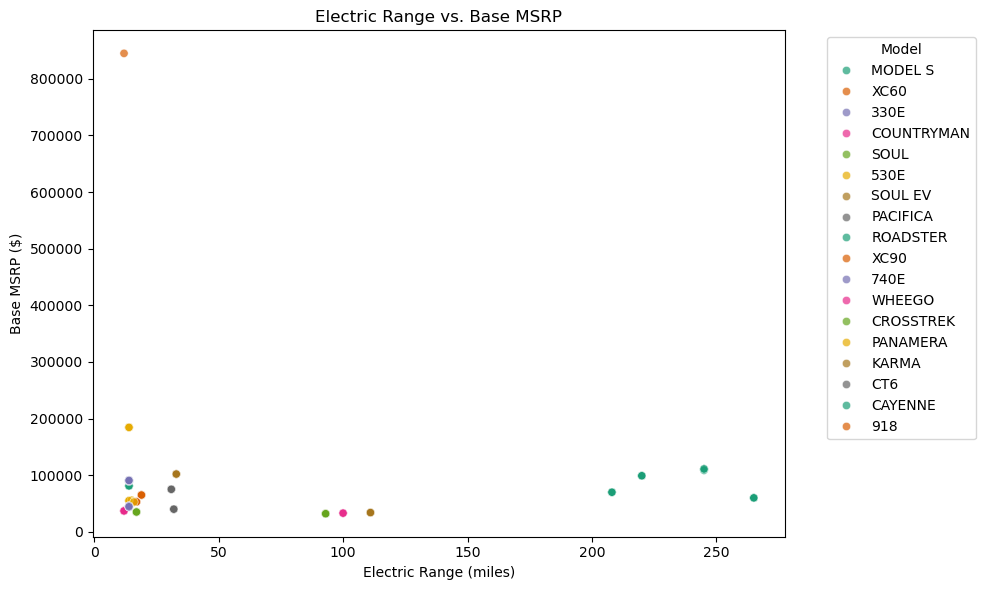

In [11]:
# I want to see it by model
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Electric Range', y='Base MSRP', hue='Model', palette='Dark2', alpha=0.7)

plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')

plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

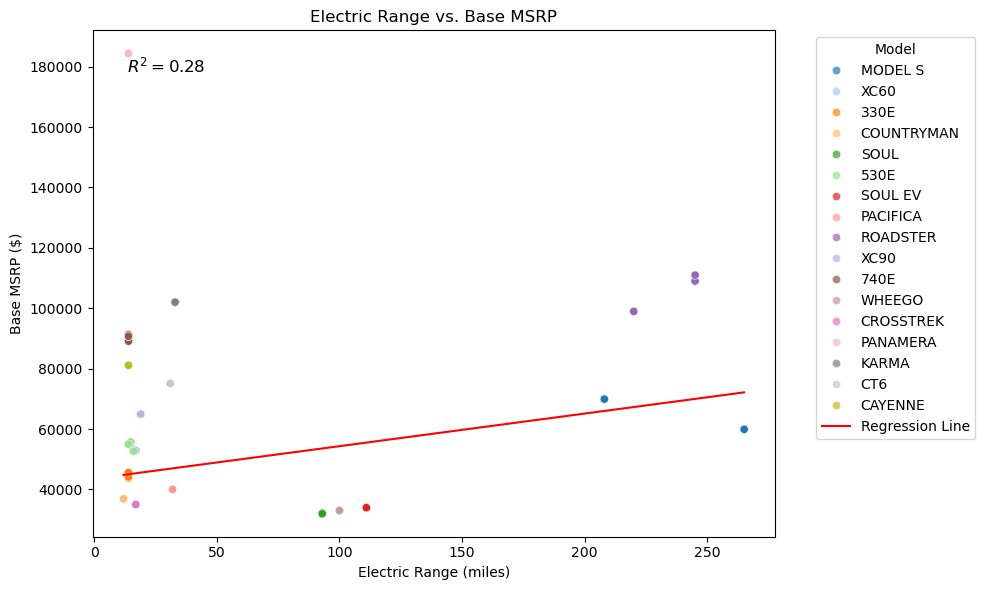

In [12]:
# Let's drop that outlier by Porsche and run a correlation
# Dropping outlier
filtered_df = filtered_df[(filtered_df['Base MSRP'] < 800000)]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='Electric Range', y='Base MSRP', hue='Model', palette='tab20', alpha=0.7)

# Calculate the linear regression line
slope, intercept, r_value, p_value, std_err = linregress(filtered_df['Electric Range'], filtered_df['Base MSRP'])

# Create the regression line
x_vals = np.linspace(filtered_df['Electric Range'].min(), filtered_df['Electric Range'].max(), 100)
y_vals = slope * x_vals + intercept

# Plot the regression line
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

# Display the R^2 value on the plot
plt.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

# Title and labels
plt.title('Electric Range vs. Base MSRP')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')

# Legend
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## That's.... not great. Just looking at it you can see it violates a lot of the assumptions about linear regression. Although it's lame not to have a cool correlation, we can at least find out what cars you should buy if you were to get an electric vehicle.

In [13]:
# Sort of some arbitrary metric I made up to find out which cars are most cost-efficient
filtered_df['MSRP/Range'] = filtered_df['Base MSRP'] / filtered_df['Electric Range']

# Drop duplicates to keep only unique vehicle makes
unique_vehicles = filtered_df.drop_duplicates(subset=['Model'])

# Sort by Cost per Mile and get the top three entries
top_three_cost_efficient = unique_vehicles.nsmallest(3, 'MSRP/Range')

# Display the top three most cost-efficient unique vehicles
print("Top Three Most Cost-Efficient Vehicles:")
print(top_three_cost_efficient[['Model', 'Base MSRP', 'Electric Range', 'MSRP/Range']])

Top Three Most Cost-Efficient Vehicles:
        Model  Base MSRP  Electric Range  MSRP/Range
2864   WHEEGO      32995             100  329.950000
4     MODEL S      69900             208  336.057692
676      SOUL      31950              93  343.548387


## Let's try something else... A correlation matrix should give us an idea! To be honest this should've been the first thing I did :p

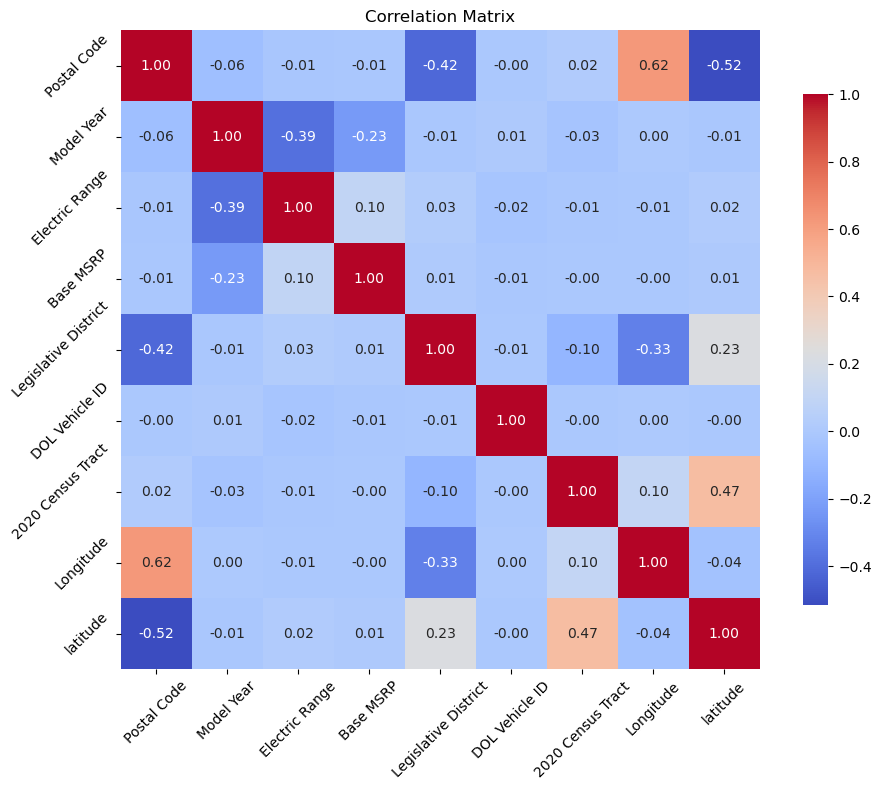

In [14]:
# Pull out only numeric values because.. it just doesn't work otherwise.
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

## Seems like there aren't a lot of good ones. If I can't do anything numerically interesting, I'll have to try more things geographical. I'll zoom in on Seattle.

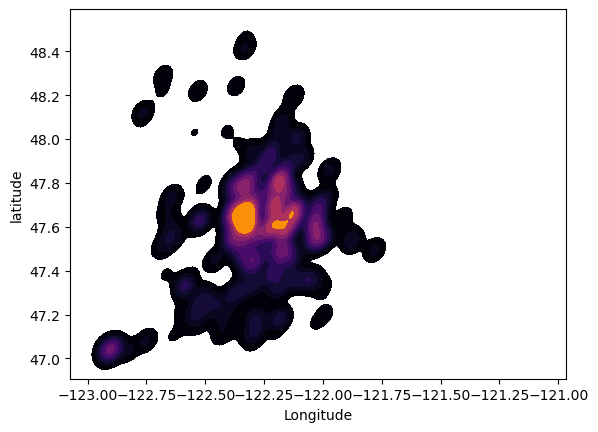

In [15]:
columns_county_range = ['Electric Range', 'latitude', 'Longitude']
countyrange = df[columns_county_range]

filtered_countyrange = countyrange[
    (countyrange['latitude'] >= 47) & (countyrange['latitude'] <= 48.5) &
    (countyrange['Longitude'] >= -123) & (countyrange['Longitude'] <= -121)
]

sns.kdeplot(x='Longitude', y='latitude', data=filtered_countyrange, fill=True, cmap='inferno')

plt.show()

### This is close to what I want, but I'll zoom in more.

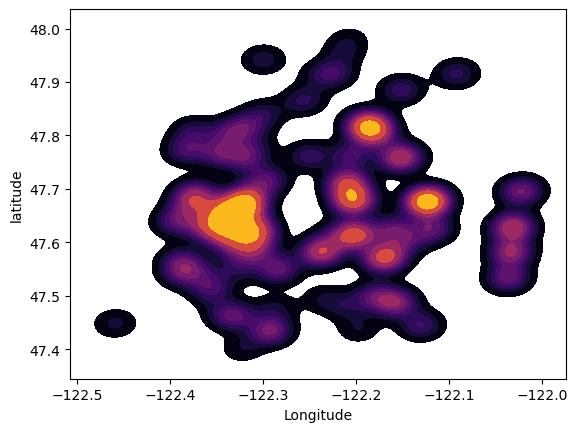

In [16]:
columns_county_range = ['Electric Range', 'latitude', 'Longitude']
countyrange = df[columns_county_range]

filtered_countyrange = countyrange[
    (countyrange['latitude'] >= 47.4) & (countyrange['latitude'] <= 48) &
    (countyrange['Longitude'] >= -122.5) & (countyrange['Longitude'] <= -122)
]

sns.kdeplot(x='Longitude', y='latitude', data=filtered_countyrange, fill=True, cmap='inferno')

plt.show()

### That's more like it. Look at those blobs, aren't they beautiful? Now if only I knew how to make sense of them. I think MSRP might be a more interesting one to look at, because maybe more affluent areas have more expensive cars.

<Axes: xlabel='Longitude', ylabel='latitude'>

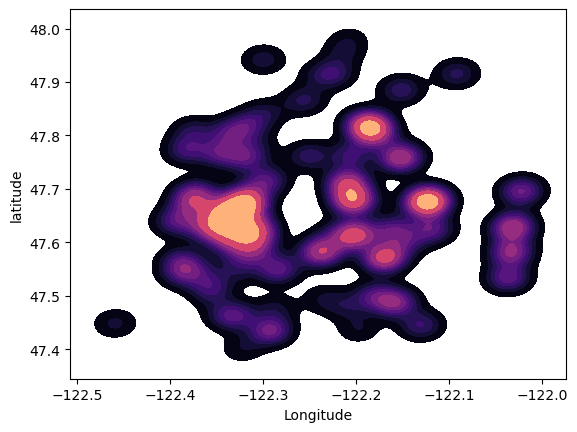

In [17]:
columns_county_MSRP = ['Base MSRP', 'latitude', 'Longitude']
countyMSRP = df[columns_county_MSRP]
filtered_countyMSRP = countyMSRP[
    (countyMSRP['latitude'] >= 47.4) & (countyMSRP['latitude'] <= 48) &
    (countyMSRP['Longitude'] >= -122.5) & (countyMSRP['Longitude'] <= -122)
]
sns.kdeplot(x='Longitude', y='latitude', data=filtered_countyMSRP, fill=True, cmap='magma')

### And it's the exact same :|

In [ ]:
columns_county_MSRP = ['Base MSRP', 'latitude', 'Longitude']
countyMSRP = df[columns_county_MSRP]
filtered_countyMSRP = countyMSRP[
    (countyMSRP['latitude'] >= 47.6) & (countyMSRP['latitude'] <= 47.75) &
    (countyMSRP['Longitude'] >= -122.4) & (countyMSRP['Longitude'] <= -122.3)
]
sns.kdeplot(x='Longitude', y='latitude', data=filtered_countyMSRP, fill=True, cmap='magma')